In [ ]:
This lecture is based on "DAT4 Course". https://github.com/justmarkham/DAT4

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict smth!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

In [1]:
import numpy as np
import random as r
%matplotlib inline
import matplotlib.pyplot as plt
r.seed(0)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Generate random dataset.

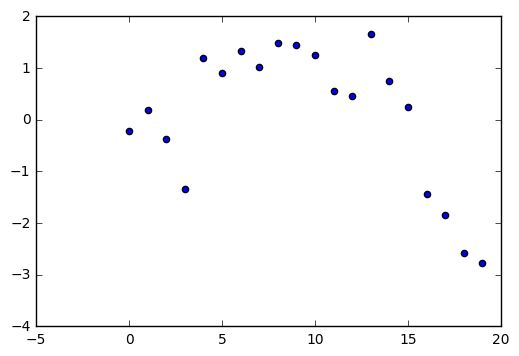

In [2]:
num_data_points = 20

y = np.random.randn(num_data_points, 1)
# y = np.random.normal(loc=0.0, scale=0.1, size=(num_data_points, 1))

y = np.cumsum(y).reshape(num_data_points, 1)
x = np.arange(num_data_points, dtype='float32').reshape(num_data_points, 1)

plt.scatter(x, y)
plt.show()

Dataset shape - x: (20, 1) y: (20, 1)
MSE: 1.48618505267


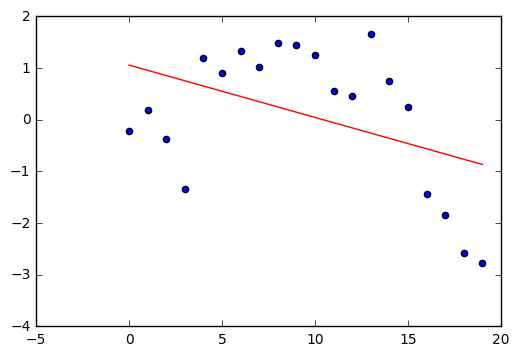

In [3]:
print('Dataset shape - x:', x.shape, 'y:', y.shape)

# Fit sklearn linear regression
clf = LinearRegression()
clf.fit(x, y)
y_pred = clf.predict(x)

mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

# Plot result
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

We can easily fit polynomial data without any changes to the algorithm. This is called polynomial regression.

In [4]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

Dataset shape - x_with_square: (20, 2) y: (20, 1)
MSE: 0.389453836351


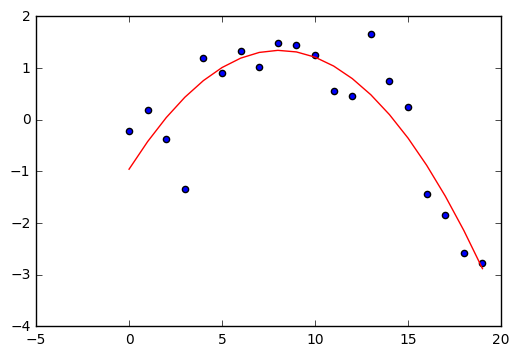

In [5]:
x_with_square = np.hstack((x, x ** 2))

scaler = StandardScaler()
x_with_square = scaler.fit_transform(x_with_square)

print('Dataset shape - x_with_square:', x_with_square.shape, 'y:', y.shape)

clf = LinearRegression()
clf.fit(x_with_square, y)
y_pred = clf.predict(x_with_square)

mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Let's try different polynomial degrees.

MSE: 1.48618506446


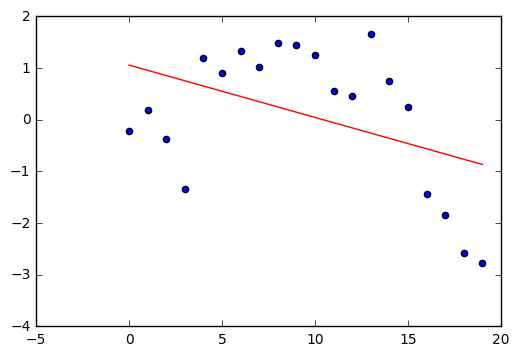

In [6]:
# jupyter nbextension enable --py widgetsnbextension
def fit_poly(degree=1):
    poly = PolynomialFeatures(degree, include_bias=False)
    # Standardize input features.
    scaler = StandardScaler()
    norm_x = scaler.fit_transform(x) # If we don't standardize x here, we'll have an overflow
    
    # Create polynomial features.
    X_poly = poly.fit_transform(norm_x)
    
    # Standardize polynomial features.
    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)

    clf = LinearRegression()
    clf.fit(X_poly, y)
    y_pred = clf.predict(X_poly)
    
    mse = mean_squared_error(y, y_pred)
    print('MSE:', mse)

    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.show()
    
interact(fit_poly, degree=(1, 20));

Now let's implement gradient descent algorithm.

0.8444218515250481 0.7579544029403025
[ 0.09615255] [-0.58393926]
MSE: 1.48618506123
[ 1.48618506]


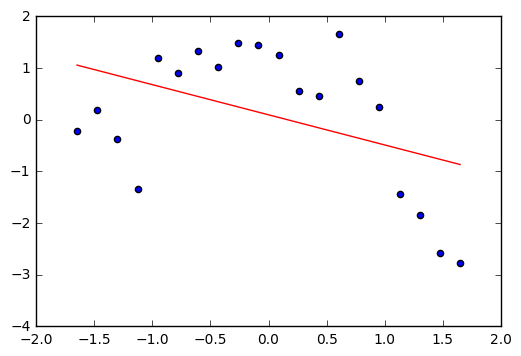

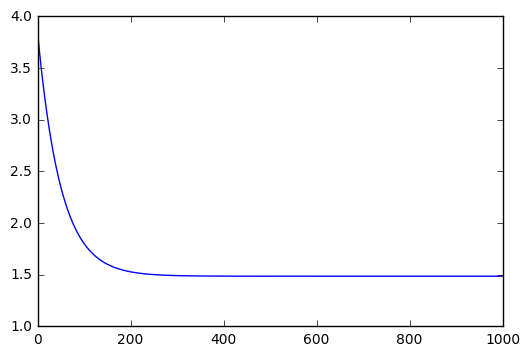

In [7]:
import math

# Initialize coefficients with random values
b0, b1 = r.random(), r.random()

cost_function_values = []

batch_size = 32

#mean_x = sum(xs) / len(xs)
#std_dev = math.sqrt(sum([(x - mean_x)**2 for x in xs]) / len(xs))
#xs = [(x - mean_x) / std_dev for x in xs]
# print(mean_x, std_dev)

x = standardize(x)
print(b0, b1)
num_batches = int(num_data_points / batch_size)

for e in range(1000):
#     random_idxs = np.random.shuffle(np.arange(num_data_points))
    epoch_losses = []
    nn = 0
    for i in range(0, num_data_points, batch_size):
        error0, error1 = 0, 0
        batch_squared_error = 0
        num_processed_in_batch = 0
        for b in range(batch_size):
            if i + b == num_data_points:
                break
            
            num_processed_in_batch += 1
            pred = b0 + b1 * x[i + b]
            error = pred - y[i + b]
            batch_squared_error += error ** 2

            error0 += error
            error1 += error * x[i + b]
            
        b0 = b0 - 0.01 * error0 / num_processed_in_batch
        b1 = b1 - 0.01 * error1 / num_processed_in_batch
        if num_processed_in_batch:
            epoch_losses.append(batch_squared_error / num_processed_in_batch)
    
    if epoch_losses:
        cost_function_values.append(sum(epoch_losses) / len(epoch_losses))
    
print(b0, b1)

pred = []
for el in x:
    pred.append(b0 + b1 * el)

mse = mean_squared_error(y, pred)
print('MSE:', mse)
print(cost_function_values[-1])
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()